In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import struct
import numpy as np
import itertools
from dbn.tensorflow import SupervisedDBNClassification

In [5]:
"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "./data/raw"):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return img.astype(np.float64), lbl.astype(np.float64)

def squash_data(data):
    data = data.reshape(data.shape[0],-1)
    return data

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
train_images, train_labels = read('training')
test_images, test_labels = read('testing')
train_x = squash_data(train_images)
test_x = squash_data(test_images)

## KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

('k = ', 1, ' Accuracy = ', 0.9691)


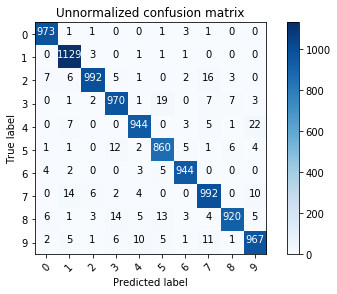

('k = ', 3, ' Accuracy = ', 0.9705)


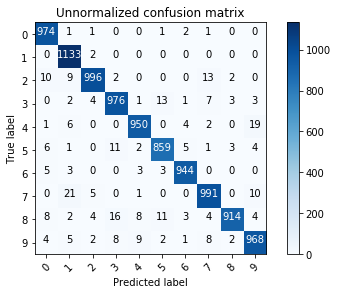

('k = ', 5, ' Accuracy = ', 0.9688)


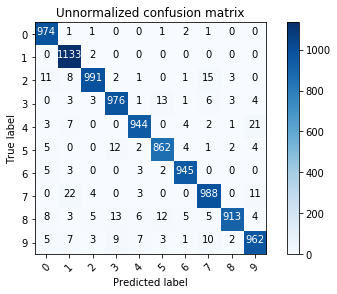

('k = ', 7, ' Accuracy = ', 0.9694)


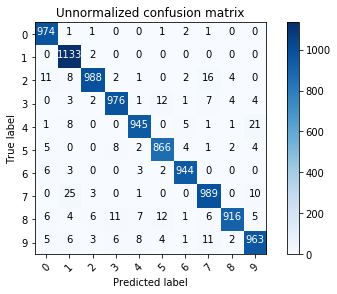

In [5]:
for k in [1,3,5,7]:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(train_x, train_labels)
    test_pred = model.predict(test_x)
    print('k = ',k,' Accuracy = ',accuracy_score(test_labels, test_pred))
    
    # Confusion matrix
    cnf_matrix = confusion_matrix(test_labels, test_pred)
    plt.figure()
    class_names = [str(i) for i in range(10)]
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Unnormalized confusion matrix')

    plt.show()

## Linear SVM

In [9]:
from sklearn import linear_model

(' Accuracy = ', 0.8857)


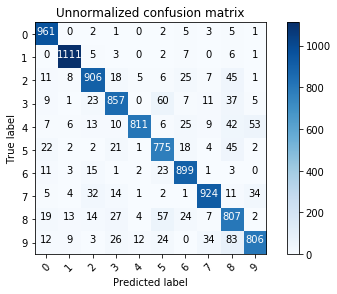

In [8]:
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=-1)
model.fit(train_x, train_labels)
test_pred = model.predict(test_x)
print(' Accuracy = ',accuracy_score(test_labels, test_pred))
# Confusion matrix
cnf_matrix = confusion_matrix(test_labels, test_pred)
plt.figure()
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Unnormalized confusion matrix')
plt.show()

## Polynomial SVM

In [5]:
from sklearn.svm import SVC

(' Accuracy = ', 0.9806)


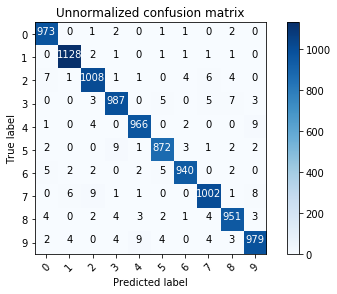

In [6]:
model = SVC(kernel='poly', degree=2)
model.fit(train_x, train_labels)
test_pred = model.predict(test_x)
print(' Accuracy = ',accuracy_score(test_labels, test_pred))
# Confusion matrix
cnf_matrix = confusion_matrix(test_labels, test_pred)
plt.figure()
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Unnormalized confusion matrix')
plt.show()